In [ ]:
### classify EEG signal to predict depth of anesthesia

*classify EEG signal to predict depth of anesthesiaclassify EEG signal to predict depth of anesthesia*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import scipy.io as sio

mat = sio.loadmat('/content/drive/MyDrive/biopaper/matlab.mat')
print(mat.keys())
f1 = mat['SaEn']
# print(f1)

dict_keys(['__header__', '__version__', '__globals__', 'SaEn', 'PeEn'])


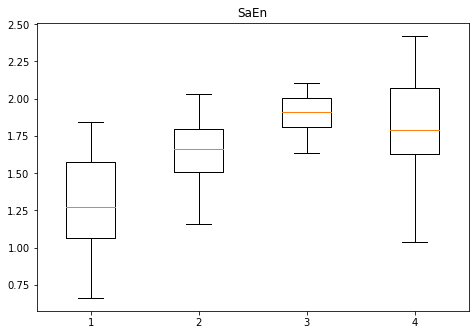

In [10]:
import pandas as pd
a = pd.read_excel('/content/drive/MyDrive/biopaper/Book1.xlsx')
feat = a.to_numpy()
# 'SaEn'
# 'PeEn'
# 'FREQ_beta'
# 'DFA'
import matplotlib.pyplot as plt
import numpy as np

f1 = feat[:,0]
data_1 = f1[:68,]
data_2 = f1[68:68*2,]
data_3 = f1[68*2:68*3,]
data_4 = f1[68*3:68*4,]
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (6,4))

ax = fig.add_axes([0,0,1,1])

bp = ax.boxplot(data)

plt.title('SaEn')
plt.show()

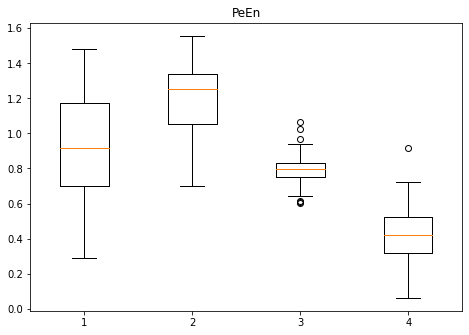

In [11]:
import matplotlib.pyplot as plt
import numpy as np

f1 = feat[:,1]
data_1 = f1[:68,]
data_2 = f1[68:68*2,]
data_3 = f1[68*2:68*3,]
data_4 = f1[68*3:68*4,]
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (6,4))

ax = fig.add_axes([0,0,1,1])

bp = ax.boxplot(data)

plt.title('PeEn')
plt.show()

In [13]:
labels = np.concatenate((np.ones(68,)*0, np.ones(68,)*1,
                        np.ones(68,)*2, np.ones(68,)*3), axis = 0)

In [16]:
## Normalization 
## Standardization, or mean removal and variance scaling

from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(feat)

print(scaler.mean_)
print(scaler.scale_)

X_scaled = scaler.transform(feat) 

[ 1.66723559  0.84125368  0.77875841 -1.41050264]
[0.32946796 0.35415523 0.11606536 1.33618373]


In [28]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(X_scaled, 
                                            labels, test_size=0.20, random_state=0, shuffle= True)


In [29]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter = 50, solver = 'lbfgs', activation= 'relu',
                    hidden_layer_sizes=( 15,11 ,4 ),random_state = 1)

clf.fit(features_train,labels_train)
estimated_label = clf.predict(features_test)
print(estimated_label)
print(labels_test)

accuracy = clf.score(features_train,labels_train)
print("Train accuracy : ", accuracy)

accuracy = clf.score(features_test,labels_test)
print("Test accuracy : ", accuracy)


[3. 3. 2. 1. 3. 2. 1. 2. 3. 3. 3. 2. 3. 1. 1. 0. 0. 2. 0. 2. 1. 1. 3. 2.
 0. 3. 1. 3. 2. 3. 2. 1. 1. 2. 2. 2. 3. 1. 0. 3. 1. 2. 2. 1. 3. 3. 2. 2.
 0. 0. 3. 2. 0. 1. 2.]
[3. 3. 2. 1. 3. 2. 1. 2. 0. 3. 3. 2. 3. 1. 1. 0. 0. 2. 0. 2. 0. 1. 3. 2.
 0. 0. 1. 3. 2. 3. 2. 1. 1. 2. 1. 2. 3. 1. 0. 3. 1. 2. 2. 1. 0. 3. 2. 2.
 3. 0. 3. 2. 0. 1. 2.]
Train accuracy :  0.9585253456221198
Test accuracy :  0.8909090909090909


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[[ 7  1  0  3]
 [ 0 12  1  0]
 [ 0  0 17  0]
 [ 1  0  0 13]]
[[0.63636364 0.09090909 0.         0.27272727]
 [0.         0.92307692 0.07692308 0.        ]
 [0.         0.         1.         0.        ]
 [0.07142857 0.         0.         0.92857143]]


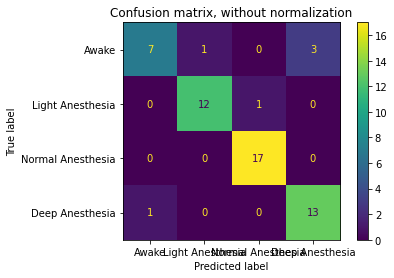

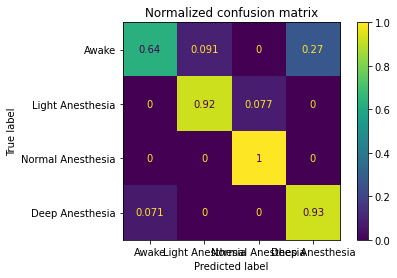

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
title_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true")
]

for title, normalize in title_options:
    disp = ConfusionMatrixDisplay.from_predictions(
        labels_test,
        estimated_label,
        # display_labels = load_iris().target_names,
        display_labels = ['Awake','Light Anesthesia','Normal Anesthesia', 'Deep Anesthesia'],
        normalize= normalize
    )
    disp.ax_.set_title(title)
    print(disp.confusion_matrix)

plt.show()


In [ ]:
## t